<a href="https://colab.research.google.com/github/ffreirea1988/djangoapp/blob/master/Redes_Convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#Cargamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

In [2]:
#Cargamos y preparamos los datos
# Cargar el dataset CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizar los datos a un rango de 0 a 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 [==============================] - 4s 0us/step


In [18]:
y_train[:1]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [33]:
# Definir las clases del CIFAR-10
clases = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'barco', 'camión']

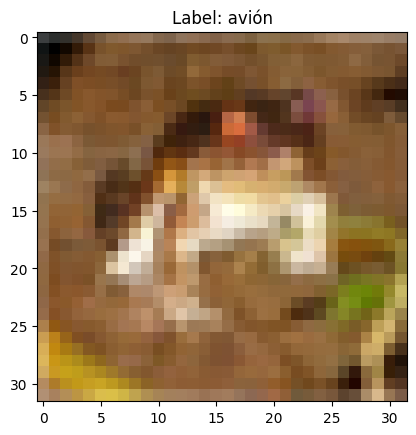

In [36]:
plt.imshow(X_train[0])
plt.title(f'Label: {clases[int(y_train[0][0])]}')
plt.show()

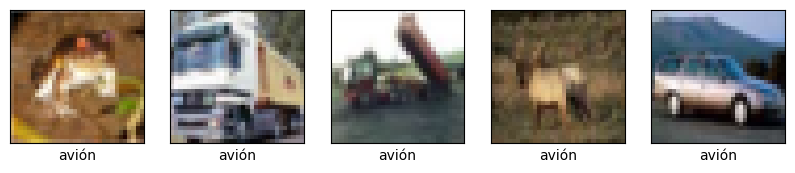

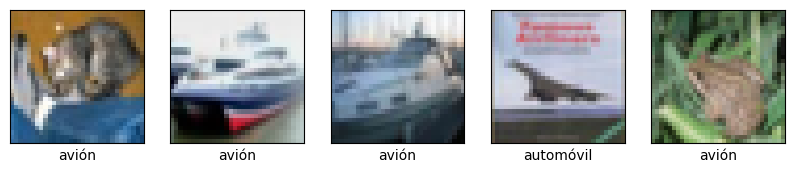

In [38]:
def mostrar_imagenes(imagenes, etiquetas, num_imagenes=5):
    plt.figure(figsize=(10, 2))

    for i in range(num_imagenes):
        plt.subplot(1, num_imagenes, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imagenes[i])
        # Acceder al primer elemento del array de etiquetas
        etiqueta = int(etiquetas[i][0])
        plt.xlabel(clases[etiqueta])
    plt.show()

# Mostrar algunas imágenes del conjunto de entrenamiento
mostrar_imagenes(X_train, y_train, num_imagenes=5)

# Mostrar algunas imágenes del conjunto de prueba
mostrar_imagenes(X_test, y_test, num_imagenes=5)

In [3]:
#Definimos el modelo secuencial
model = Sequential()

# Añadir capas convolucionales, de pooling, flatten y densas
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

Se aprecia que la red neuronal viene dada por la forma:

nn = [32, 64, 128, 128, 10]

Vale decir, la red recibirá 32 variables de entrada, pasará por las capas ocultas, y luego entregará 10 potenciales clasificaciones.

In [5]:
#Compilamos el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
#Entrenamos el modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
782/782 [==============================] - 65s 81ms/step - loss: 1.7045 - accuracy: 0.3651 - val_loss: 1.3273 - val_accuracy: 0.5188
Epoch 2/20
782/782 [==============================] - 61s 78ms/step - loss: 1.3488 - accuracy: 0.5145 - val_loss: 1.1845 - val_accuracy: 0.5786
Epoch 3/20
782/782 [==============================] - 62s 79ms/step - loss: 1.1903 - accuracy: 0.5767 - val_loss: 1.1378 - val_accuracy: 0.6016
Epoch 4/20
782/782 [==============================] - 61s 78ms/step - loss: 1.0811 - accuracy: 0.6177 - val_loss: 1.0185 - val_accuracy: 0.6406
Epoch 5/20
782/782 [==============================] - 62s 79ms/step - loss: 1.0036 - accuracy: 0.6482 - val_loss: 1.0036 - val_accuracy: 0.6491
Epoch 6/20
782/782 [==============================] - 60s 77ms/step - loss: 0.9413 - accuracy: 0.6724 - val_loss: 0.8993 - val_accuracy: 0.6850
Epoch 7/20
782/782 [==============================] - 62s 79ms/step - loss: 0.8812 - accuracy: 0.6908 - val_loss: 0.8685 - val_accuracy:

Notar que después de la epoch 10, el val_loss comienza a aumentar, por lo que el modelo se está sobreajustando, y solo está disminuyendo la pérdida del entrenamiento.

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 4s 12ms/step - loss: 0.8718 - accuracy: 0.7328
Test accuracy: 0.7328000068664551
